# Data preparation


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import seaborn as sns
'''
fig_params={'legend.fontsize':28,
          'axes.labelsize': 28,
          'axes.titlesize':32,
          'xtick.labelsize':24,
          'ytick.labelsize':24,             
          'axes.facecolor':'#D9DDD1'}
plt.rcParams.update(fig_params)
'''

%matplotlib inline

In [2]:
df=pd.read_csv('./data/FuelConsumption_final.csv')

In [3]:
X=df[['MODEL_YEAR', 'ENGINE_SIZE', 'CYLINDERS', 'FUEL_CONSUMPTION_CITY',
       'FUEL_CONSUMPTION_HWY', 'FUEL_CONSUMPTION_COMB', 'E',
       'N', 'X', 'Z', 'E.1', 'N.1', 'X.1', 'Z.1', 'FULL-SIZE', 'MID-SIZE',
       'MINICOMPACT', 'MINIVAN', 'PICKUP TRUCK - SMALL',
       'PICKUP TRUCK - STANDARD', 'SPECIAL PURPOSE VEHICLE',
       'STATION WAGON - MID-SIZE', 'STATION WAGON - SMALL', 'SUBCOMPACT',
       'SUV', 'SUV - SMALL', 'SUV - STANDARD', 'TWO-SEATER', 'VAN - CARGO',
       'VAN - PASSENGER', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'AM5', 'AM6',
       'AM7', 'AS4', 'AS5', 'AS6', 'AS7', 'AS8', 'AS9', 'AV', 'AV6', 'AV7',
       'AV8', 'M4', 'M5', 'M6', 'M7']]
y=df['CO2_EMISSIONS']

In [4]:
X_temp,X_test,y_temp,y_test=train_test_split(X,y,test_size=0.25,random_state=100)
X_train,X_cv,y_train,y_cv=train_test_split(X_temp,y_temp,test_size=0.2)

## Normalization

In [5]:
scaler=MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [6]:
def normalize(df,normalizer):
    df[['MODEL_YEAR', 'ENGINE_SIZE', 'CYLINDERS', 'FUEL_CONSUMPTION_CITY',
       'FUEL_CONSUMPTION_HWY', 'FUEL_CONSUMPTION_COMB', 'E',
       'N', 'X', 'Z', 'E.1', 'N.1', 'X.1', 'Z.1', 'FULL-SIZE', 'MID-SIZE',
       'MINICOMPACT', 'MINIVAN', 'PICKUP TRUCK - SMALL',
       'PICKUP TRUCK - STANDARD', 'SPECIAL PURPOSE VEHICLE',
       'STATION WAGON - MID-SIZE', 'STATION WAGON - SMALL', 'SUBCOMPACT',
       'SUV', 'SUV - SMALL', 'SUV - STANDARD', 'TWO-SEATER', 'VAN - CARGO',
       'VAN - PASSENGER', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'AM5', 'AM6',
       'AM7', 'AS4', 'AS5', 'AS6', 'AS7', 'AS8', 'AS9', 'AV', 'AV6', 'AV7',
       'AV8', 'M4', 'M5', 'M6', 'M7']]=normalizer.transform(df)
    return df
    

In [7]:
X_train=normalize(X_train,scaler)
X_cv=normalize(X_cv,scaler)
X_test=normalize(X_test,scaler)

<ipython-input-6-eb6d83f3988f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['MODEL_YEAR', 'ENGINE_SIZE', 'CYLINDERS', 'FUEL_CONSUMPTION_CITY',
/home/chaitanya/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
<ipython-input-6-eb6d83f3988f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

In [8]:
X_train

,MODEL_YEAR,ENGINE_SIZE,CYLINDERS,FUEL_CONSUMPTION_CITY,FUEL_CONSUMPTION_HWY,FUEL_CONSUMPTION_COMB,E,N,X,Z,...,AS8,AS9,AV,AV6,AV7,AV8,M4,M5,M6,M7
6930,0.571429,0.552632,0.571429,0.610656,0.493671,0.583756,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7580,0.571429,0.157895,0.142857,0.250000,0.234177,0.243655,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3906,0.357143,0.355263,0.285714,0.422131,0.398734,0.421320,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6586,0.500000,0.105263,0.142857,0.221311,0.170886,0.197970,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7047,0.571429,0.684211,0.428571,0.532787,0.518987,0.538071,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5965,0.500000,0.407895,0.285714,0.344262,0.272152,0.319797,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2452,0.214286,0.210526,0.142857,0.295082,0.316456,0.304569,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14192,1.000000,0.250000,0.142857,0.299180,0.291139,0.294416,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2169,0.214286,0.460526,0.285714,0.520492,0.493671,0.522843,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Model building

In [9]:
# def bestModel(model, X_train, X_cv, y_train, y_cv, grid):
#     model_cv = GridSearchCV(model, grid, cv=4)
#     model_cv.fit(X_train, y_train)
#     print("tuned hpyerparameters :(best parameters) ", model_cv.best_params_)
#     print("accuracy :", model_cv.best_score_)
#     mod_best= model_cv.best_estimator_
#     return mod_best


# def testModel(model, X_train, X_cv, y_train, y_cv):
#     model.fit(X_train,y_train)
#     y_pred_tr = model.predict(X_train)
#     y_pred_cv = model.predict(X_cv)
#     precision_tr, recall_tr, fscore_tr, support_tr = precision_recall_fscore_support(
#         y_train, y_pred_tr, average='macro')
#     precision_cv, recall_cv, fscore_cv, support_cv = precision_recall_fscore_support(
#         y_cv, y_pred_cv, average='macro')
#     report= np.array([precision_tr, recall_tr, fscore_tr, precision_cv, recall_cv, fscore_cv])
#     return report



## Linear Regression

In [10]:
linReg=LinearRegression()
linReg.fit(X_train,y_train)

y_train_pred=linReg.predict(X_train)
y_cv_pred=linReg.predict(X_cv)

In [11]:
print('mean sq error training data : ',mean_squared_error(y_train,y_train_pred))
print('mean sq error cross-val data : ',mean_squared_error(y_cv,y_cv_pred))
print()
print('mean abs error training data : ',mean_absolute_error(y_train,y_train_pred))
print('mean abs error cross-val data : ',mean_absolute_error(y_cv,y_cv_pred))

mean sq error training data :  21.32034958236904
mean sq error cross-val data :  23.90715707020509

mean abs error training data :  2.128777293882467
mean abs error cross-val data :  2.29065605932726


<AxesSubplot:xlabel='CO2_EMISSIONS', ylabel='Count'>

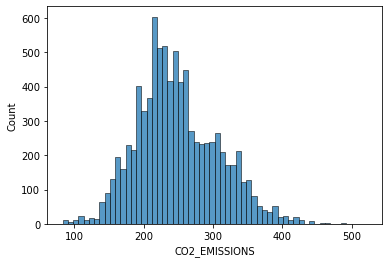

In [12]:
sns.histplot(data=y_train)

Text(0, 0.5, 'Predicted')

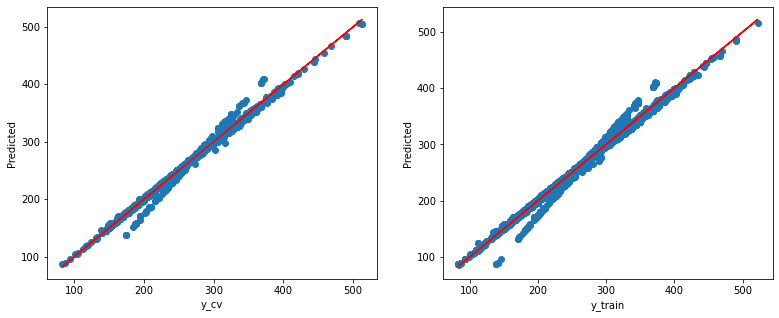

In [13]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(13,5))
ax[0].scatter(y_cv,y_cv_pred)
ax[0].plot(y_cv,y_cv,'r')
ax[0].set_xlabel('y_cv')
ax[0].set_ylabel('Predicted')
ax[1].scatter(y_train,y_train_pred)
ax[1].plot(y_train,y_train,'r')
ax[1].set_xlabel('y_train');ax[1].set_ylabel('Predicted')

## ANN

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout

In [15]:
print(X_train.shape,y_train.shape)

(8551, 53) (8551,)


In [16]:
model=Sequential()
model.add(Dense(units=53,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(units=53,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mse')

In [17]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [18]:
model.fit(x=X_train.values, 
          y=y_train.values, 
          epochs=600,
          validation_data=(X_cv.values, y_cv.values), verbose=1,
          callbacks=[early_stop])

Epoch 1/600
268/268 [==============================] - 1s 3ms/step - loss: 51021.1276 - val_loss: 1319.4023
Epoch 2/600
268/268 [==============================] - 1s 2ms/step - loss: 3662.8975 - val_loss: 792.6912
Epoch 3/600
268/268 [==============================] - 1s 3ms/step - loss: 3119.2436 - val_loss: 593.0241
Epoch 4/600
268/268 [==============================] - 1s 2ms/step - loss: 3014.8946 - val_loss: 462.3726
Epoch 5/600
268/268 [==============================] - 1s 2ms/step - loss: 2755.4029 - val_loss: 416.3936
Epoch 6/600
268/268 [==============================] - 1s 2ms/step - loss: 2498.0736 - val_loss: 337.1323
Epoch 7/600
268/268 [==============================] - 1s 2ms/step - loss: 2502.4241 - val_loss: 304.6623
Epoch 8/600
268/268 [==============================] - 1s 2ms/step - loss: 2443.7117 - val_loss: 363.8788
Epoch 9/600
268/268 [==============================] - 1s 3ms/step - loss: 2466.7505 - val_loss: 271.7109
Epoch 10/600
268/268 [======================

Epoch 78/600
268/268 [==============================] - 1s 2ms/step - loss: 1563.6669 - val_loss: 115.3812
Epoch 79/600
268/268 [==============================] - 1s 2ms/step - loss: 1485.0751 - val_loss: 26.5349
Epoch 80/600
268/268 [==============================] - 1s 2ms/step - loss: 1512.7403 - val_loss: 53.8156
Epoch 81/600
268/268 [==============================] - 1s 2ms/step - loss: 1449.2375 - val_loss: 70.1216
Epoch 82/600
268/268 [==============================] - 1s 2ms/step - loss: 1496.8615 - val_loss: 32.1647
Epoch 83/600
268/268 [==============================] - 1s 2ms/step - loss: 1422.5557 - val_loss: 134.3432
Epoch 84/600
268/268 [==============================] - 1s 2ms/step - loss: 1384.0199 - val_loss: 94.4806
Epoch 85/600
268/268 [==============================] - 1s 2ms/step - loss: 1423.8208 - val_loss: 87.8541
Epoch 86/600
268/268 [==============================] - 1s 2ms/step - loss: 1413.5200 - val_loss: 99.9855
Epoch 87/600
268/268 [======================

<AxesSubplot:>

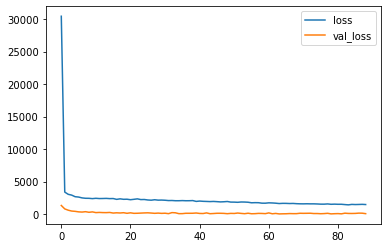

In [19]:
losses=pd.DataFrame(model.history.history)
losses.plot()

In [20]:
y_train_pred_nn=model.predict(X_train)
y_cv_pred_nn=model.predict(X_cv)

In [21]:
print('mean sq error training data : ',mean_squared_error(y_train,y_train_pred_nn))
print('mean sq error cross-val data : ',mean_squared_error(y_cv,y_cv_pred_nn))
print()
print('mean abs error training data : ',mean_absolute_error(y_train,y_train_pred_nn))
print('mean abs error cross-val data : ',mean_absolute_error(y_cv,y_cv_pred_nn))

mean sq error training data :  64.59578706765234
mean sq error cross-val data :  62.31008503162537

mean abs error training data :  6.451089048201599
mean abs error cross-val data :  6.435650831745315


Text(0, 0.5, 'Predicted')

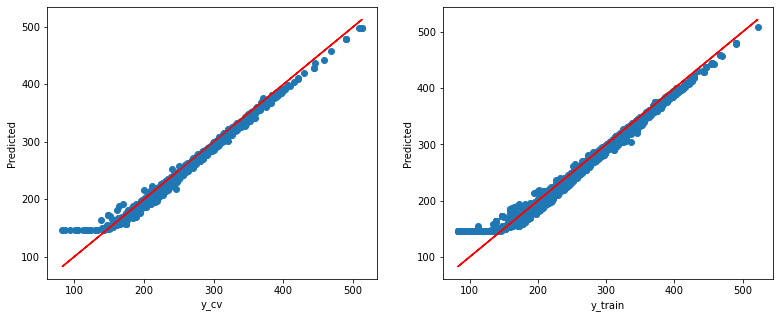

In [22]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(13,5))
ax[0].scatter(y_cv,y_cv_pred_nn)
ax[0].plot(y_cv,y_cv,'r')
ax[0].set_xlabel('y_cv')
ax[0].set_ylabel('Predicted')
ax[1].scatter(y_train,y_train_pred_nn)
ax[1].plot(y_train,y_train,'r')
ax[1].set_xlabel('y_train');ax[1].set_ylabel('Predicted')

The linear model gives better results for CO2 prediction based on vehicle features. 
Therefore, for the test data, we use Linear Regression model

## Test data

In [23]:
y_test_pred=linReg.predict(X_test_f)

NameError: name 'X_test_f' is not defined

In [ ]:
print('mean sq error test data linReg : ',mean_squared_error(y_test_f,y_test_pred))
print('mean abs error test data linReg : ',mean_absolute_error(y_test_f,y_test_pred))